<div class='bar_title'></div>

*Smart Cities and Geospatial Data Analysis*

# Assignment 2: Data Handling in Python

Gunther Gust / Ignacio Ubeda<br>
Chair for Enterprise AI

Winter Semester 23/24

*Credits: Most of the material is taken from [Arribas-Bel, Geographic Data Science](https://darribas.org/gds_course/content/home.html#)*

In [1]:
import os
import pandas as pd
import seaborn as sns

This section is all about you taking charge of the steering wheel and choosing your own adventure. For this block, we are going to use what we've learnt [before](lab_B) to take a look at a dataset of casualties in the war in Afghanistan. The data was originally released by Wikileaks, and the version we will use is published by The Guardian.

```{margin}
You can read a bit more about the data at The Guardian's [data blog](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism)
``` 

## Data preparation

Before you can set off on your data journey, the dataset needs to be read, and there's a couple of details we will get out of the way so it is then easier for you to start working.

The data are published on a Google Sheet you can check out at:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

As you will see, each row includes casualties recorded month by month, split by Taliban, Civilians, Afghan forces, and NATO.

We will load a copy of the same data set.

In [2]:
filepath = os.path.join('data', 'wikileaks_warlogs.csv')
df = pd.read_csv(filepath, skiprows= [0], skipfooter=1, thousands=",", engine = "python")

Note also we use the `skiprows=[0]` to avoid reading the top row as well as `skipfooter = 1` to avoid the final bottom row.  If you check on the Google Sheet, these rows involve the title of the table and column totals, respectively.

Let's fill missing values with zeros and display the data. 

In [3]:
df = df.fillna(0)

In [4]:
df.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004,January,15.0,51,23.0,0.0,11
1,2004,February,0.0,7,4.0,5.0,2
2,2004,March,19.0,2,0.0,2.0,3
3,2004,April,5.0,3,19.0,0.0,3
4,2004,May,18.0,29,56.0,6.0,9


Now we are good to go!

## Tasks

Now, the challenge is to put to work what we have learnt in this block. For that, the suggestion is that you carry out an analysis of the Afghan Logs in a similar way as how we looked at population composition in Liverpool. These are of course very different datasets reflecting immensely different realities. Their structure, however, is relatively parallel: both capture counts aggregated by a spatial (neighbourhood) or temporal unit (month), and each count is split by a few categories.

Try to answer the following questions:

- Obtain the minimum number of civilian casualties (in what month was that?)


In [5]:
min_civ = df["Civilians"].min()
df.loc[(df["Civilians"]== min_civ),["Civilians", "Month","Year"]]


,Civilians,Month,Year
2,2,March,2004


- How many NATO casualties were registered in August 2008?

In [6]:
df.loc[(df["Month"]=="August") & (df["Year"]== 2008),["Month", "Year", "Nato - official figures"]]


,Month,Year,Nato - official figures
55,August,2008,46


- What is the month with the largest total number of casualties? (Hint:You will need to first create a column with total counts)

In [26]:
#Drop the "unofficial" NATO column first 
df["Total"] = df.drop('Nato (detailed in spreadsheet)', axis=1).loc[:, "Taliban":"Nato - official figures"].sum(axis = 1)
maximum = df["Total"].max()
df.loc[(df["Total"]==maximum),]

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Total
2006-09,2006,September,945.0,172,97.0,19.0,38,1252.0


- Can you make a plot of the distribution of casualties over time?

In [27]:
#Month names to numeric values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

#Set Year-Month to index
df.index = pd.to_datetime(df['Year'].astype(str) + '-'+ df['Month'].apply(lambda x: month_mapping[x]).astype(str), format='%Y-%m')

#Keep only Year-Month
df.index = df.index.strftime('%Y-%m')

df.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Total
2004-01,2004,January,15.0,51,23.0,0.0,11,100.0
2004-02,2004,February,0.0,7,4.0,5.0,2,13.0
2004-03,2004,March,19.0,2,0.0,2.0,3,24.0
2004-04,2004,April,5.0,3,19.0,0.0,3,30.0
2004-05,2004,May,18.0,29,56.0,6.0,9,112.0


##### 1st Option

<Axes: >

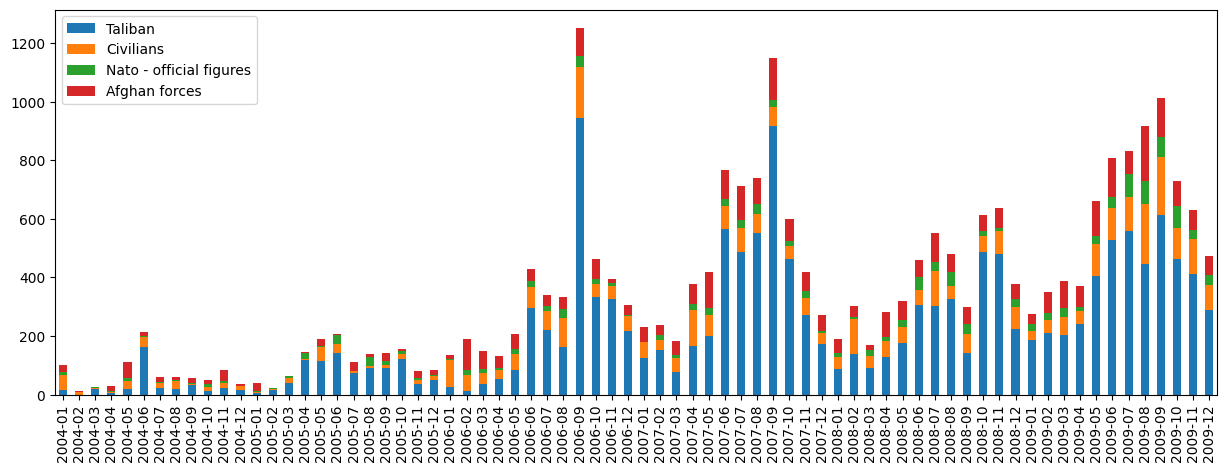

In [28]:
df[['Taliban', 'Civilians', 'Nato - official figures', 'Afghan forces']].plot(kind='bar', stacked=True, figsize=(15, 5))

##### 2nd Option

<Axes: >

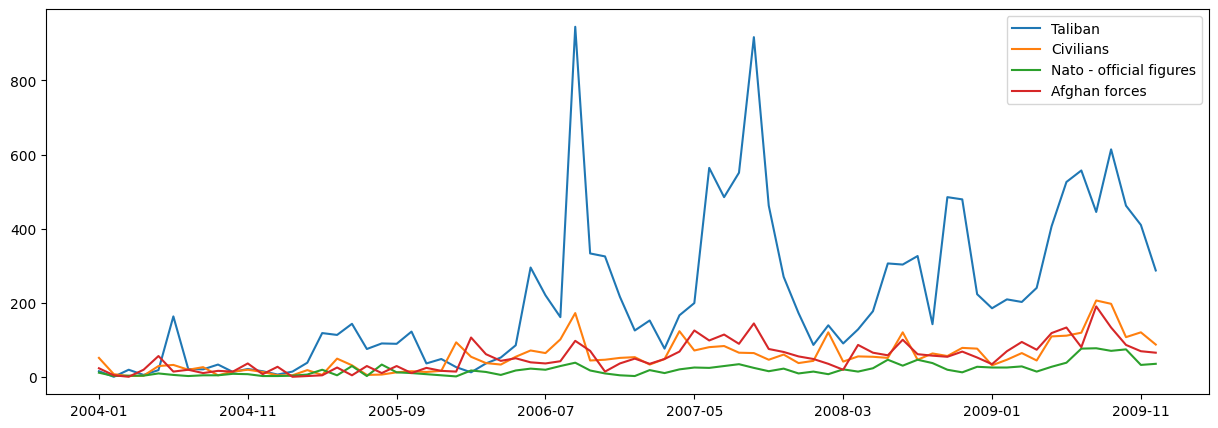

In [29]:
df[['Taliban', 'Civilians', 'Nato - official figures', 'Afghan forces']].plot(kind='line', stacked=False, figsize=(15, 5))

##### 3rd Option

<Axes: xlabel='Total', ylabel='Count'>

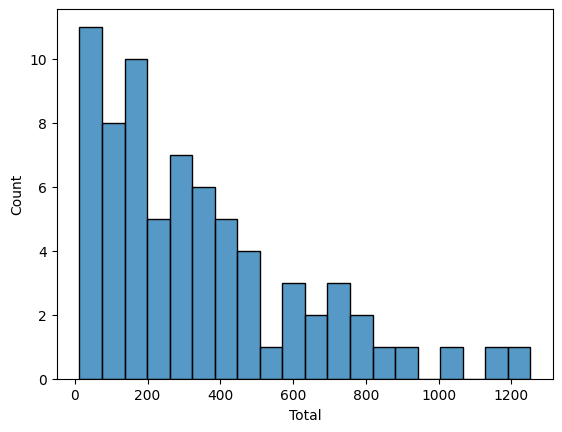

In [31]:
sns.histplot(df["Total"], bins = 20)

<Axes: xlabel='Total', ylabel='Density'>

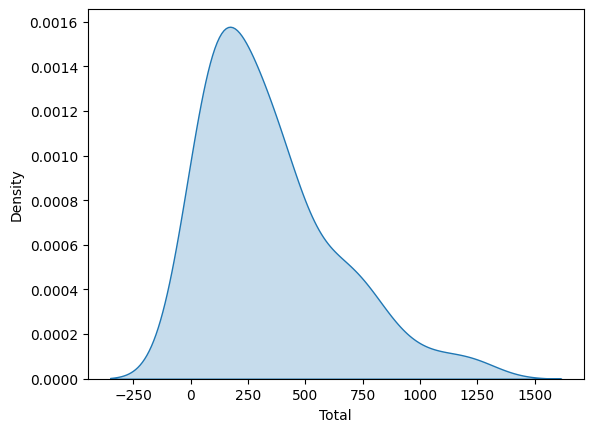

In [30]:
sns.kdeplot(df["Total"], fill = True)